## 1. Defining the Problem
Given characteristics of the cell nuclei computed from digitized image of a fine needle aspirate (FNA) of a breast mass find out whether the tumor is benign or malignant. In this kernel I explore the data, select features and train and compare different Machine Learning models as an exercise inspired by other kaggle kernels.

## 2. Gathering the Data

Taken from [Kaggle Breast Cancer Wisconsin Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

Attribute Information:

* ID number
* Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## 3. Prepare Data

We need to load the data and import everything we need.

In [1]:
import sys
import pandas as pd
import matplotlib 
import numpy as np
import scipy as sp
import IPython
from IPython import display

import sklearn 

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
raw_data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

data1 = raw_data.copy(deep=True)

print(raw_data.info())
raw_data.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
533  91930402         M       20.470         20.67          134.70     1299.0   
112     86409         B       14.260         19.65           97.83      629.9   
127    866203         M       19.000         18.91          123.40     1138.0   
296    891936         B       10.910         12.35           69.14      363.7   
387    902976         B       13.880         16.16           88.37      596.6   
521  91762702         M       24.630         21.60          165.50     1841.0   
21    8510824         B        9.504         12.44           60.34      273.9   
357    901028         B       13.870         16.21           88.52      593.7   
142    869218         B       11.430         17.31           73.66      398.0   
39     855138         M       13.480         20.82           88.40      559.2   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
533          0.09156           0.13130         0.15230             0.101500   
112          0.07837           0.22330         0.30030             0.077980   
127          0.08217           0.08028         0.09271             0.056270   
296          0.08518           0.04721         0.01236             0.013690   
387          0.07026           0.04831         0.02045             0.008507   
521          0.10300           0.21060         0.23100             0.147100   
21           0.10240           0.06492         0.02956             0.020760   
357          0.08743           0.05492         0.01502             0.020880   
142          0.10920           0.09486         0.02031             0.018610   
39           0.10160           0.12550         0.10630             0.054390   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
533  ...          27.15           152.00      1645.0           0.10970   
112  ...          23.73           107.00       709.0           0.08949   
127  ...          25.73           148.20      1538.0           0.10210   
296  ...          14.82            72.42       392.2           0.09312   
387  ...          19.97            99.66       745.3           0.08484   
521  ...          26.93           205.70      2642.0           0.13420   
21   ...          15.66            65.13       314.9           0.13240   
357  ...          25.58            96.74       694.4           0.11530   
142  ...          26.76            82.66       503.0           0.14130   
39   ...          26.02           107.30       740.4           0.16100   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
533            0.25340          0.30920               0.16130          0.3220   
112            0.41930          0.67830               0.15050          0.2398   
127            0.22640          0.32070               0.12180          0.2841   
296            0.07506          0.02884               0.03194          0.2143   
387            0.12330          0.10910               0.04537          0.2542   
521            0.41880          0.46580               0.24750          0.3157   
21             0.11480          0.08867               0.06227          0.2450   
357            0.10080          0.05285               0.05556          0.2362   
142            0.17920          0.07708               0.06402          0.2584   
39             0.42250          0.50300               0.22580          0.2807   

     fractal_dimension_worst  Unnamed: 32  
533                  0.06386          NaN  
112                  0.10820          NaN  
127                  0.06541          NaN  
296                  0.06643          NaN  
387                  0.06623          NaN  
521                  0.09671          NaN  
21                   0.07773          NaN  
357                  0.07113          NaN  
142                  0.08096          NaN  
39                   0.10710          NaN  

[10 rows x 33 columns]

### 3.1 Clean Data

Lookout for empty or null values.

In [4]:
print('Train columns with null values:\n', data1.isnull().sum())
print('-'*10)

Train columns with null values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fracta

Every column except **Unnamed:32** is filled with a non-null value. Outliers or errors in the values are difficult to see at this point. Column **id** is also of no use for classification.

In [5]:
# Drop Unnamed:32 and id columns from dataset
list = ['Unnamed: 32','id']
data1.drop(list,axis = 1, inplace=True )
print(data1.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Convert categorical diagnosis label to encoded values. Here we use a label encoder but simple mapping is also possible.

In [6]:
le = LabelEncoder()
data1['diagnosis'] = le.fit_transform(data1['diagnosis'])

target = ['diagnosis']

data1_x = data1.columns.values.tolist()
data1_x.remove('diagnosis')
print('X: ', data1_x, '\n')

data1_xy = target + data1_x
print('X Y: ', data1_xy, '\n')

data1.head()

X:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'] 

X Y:  ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [7]:
X = data1[data1_x]
y = data1[target]

print("Data1 Shape: {}".format(data1.shape))
print("X Shape: {}".format(X.shape))
print("y Shape: {}".format(y.shape))

X.head()

Data1 Shape: (569, 31)
X Shape: (569, 30)
y Shape: (569, 1)


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

## 4. Explore Data and Select Features

Number of Benign:  357
Number of Malignant :  212


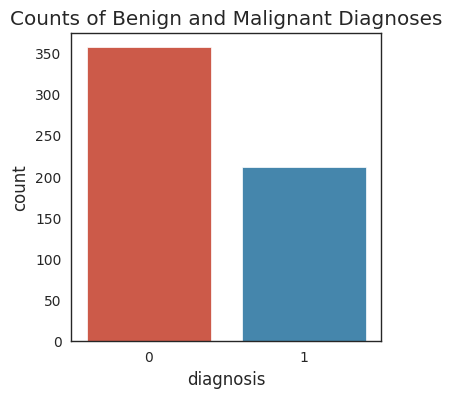

In [8]:
plt.figure(figsize=(4,4))
sns.countplot(y, x='diagnosis', label="Count")
plt.title('Counts of Benign and Malignant Diagnoses')
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [9]:
X.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

The data can be split into three parts consisting of mean, worst and standard error features.

In [10]:
mean_metrics = X.columns.values.tolist()[:10]
se_metrics = X.columns.values.tolist()[10:20]
worst_metrics = X.columns.values.tolist()[20:]
print(mean_metrics)
print("-----------------------------------")
print(se_metrics)
print("------------------------------------")
print(worst_metrics)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Plot the distributions of the three data sections. To do that we need to normalize the data first. This normalised data is just used for plotting. 

Text(0.5, 1.0, 'Distribution of Mean Features')

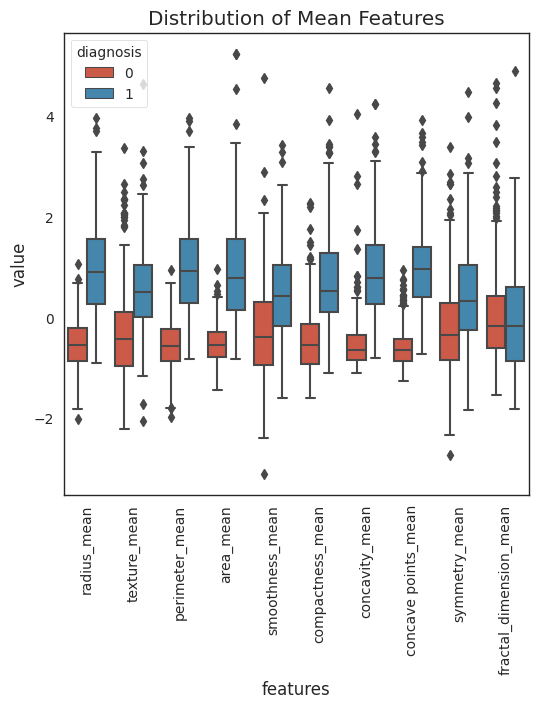

In [11]:
data_normalised = (X - X.mean()) / (X.std()) 

mean_data = pd.concat([y,data_normalised.iloc[:,0:10]],axis=1)
mean_data = pd.melt(mean_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(6,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=mean_data)
plt.xticks(rotation=90)
plt.title('Distribution of Mean Features')

Every feature except smoothness, symmetry and fractal dimension seem to be strong features for classification since the median aswell as upper and lower quantiles of those features are farther apart for each diagnosis type.

Text(0.5, 1.0, 'Distribution of Standard Error Features')

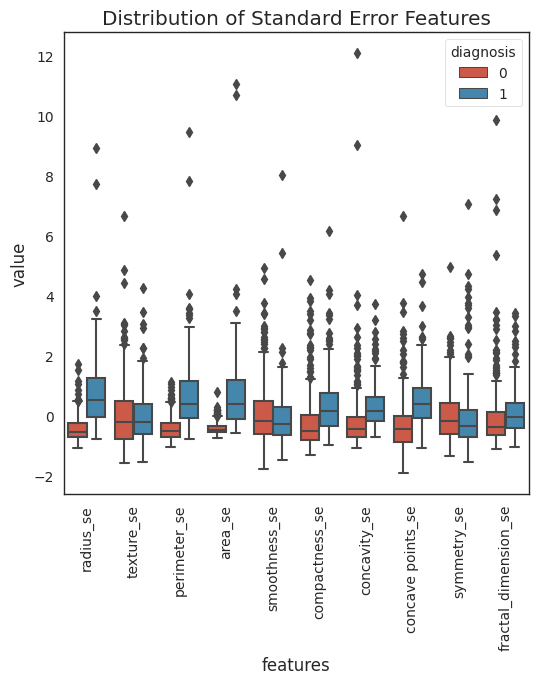

In [12]:
se_data = pd.concat([y,data_normalised.iloc[:,10:20]],axis=1)
se_data = pd.melt(se_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(6,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=se_data)
plt.xticks(rotation=90)
plt.title('Distribution of Standard Error Features')

The median and distributions for the standard error features are pretty similar except for radius, perimeter and area.

Text(0.5, 1.0, 'Distribution of Worst Features')

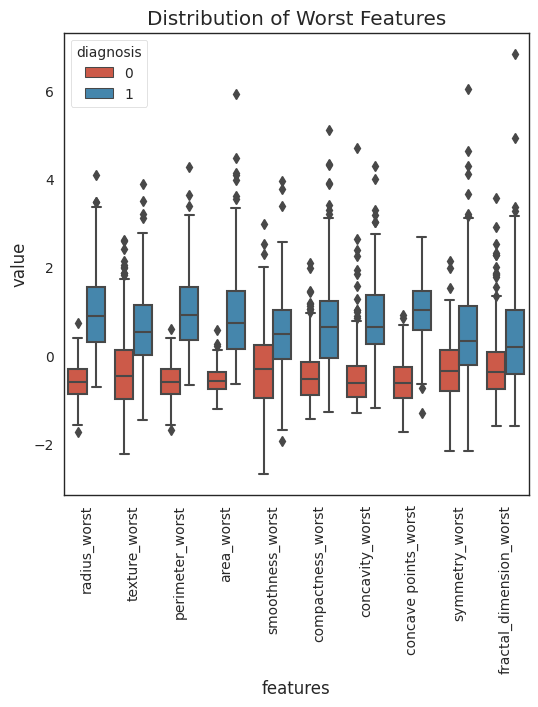

In [13]:
worst_data = pd.concat([y,data_normalised.iloc[:,20:]],axis=1)
worst_data = pd.melt(worst_data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(6,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=worst_data)
plt.xticks(rotation=90)
plt.title('Distribution of Worst Features')

Here we observe similar distributions to the mean metrics. Thus we can say that:
* radius
* texture
* perimeter
* area
* compactness
* concavity
* concave points

are features that are probably good for classification. These include both the mean and worst characteristics.

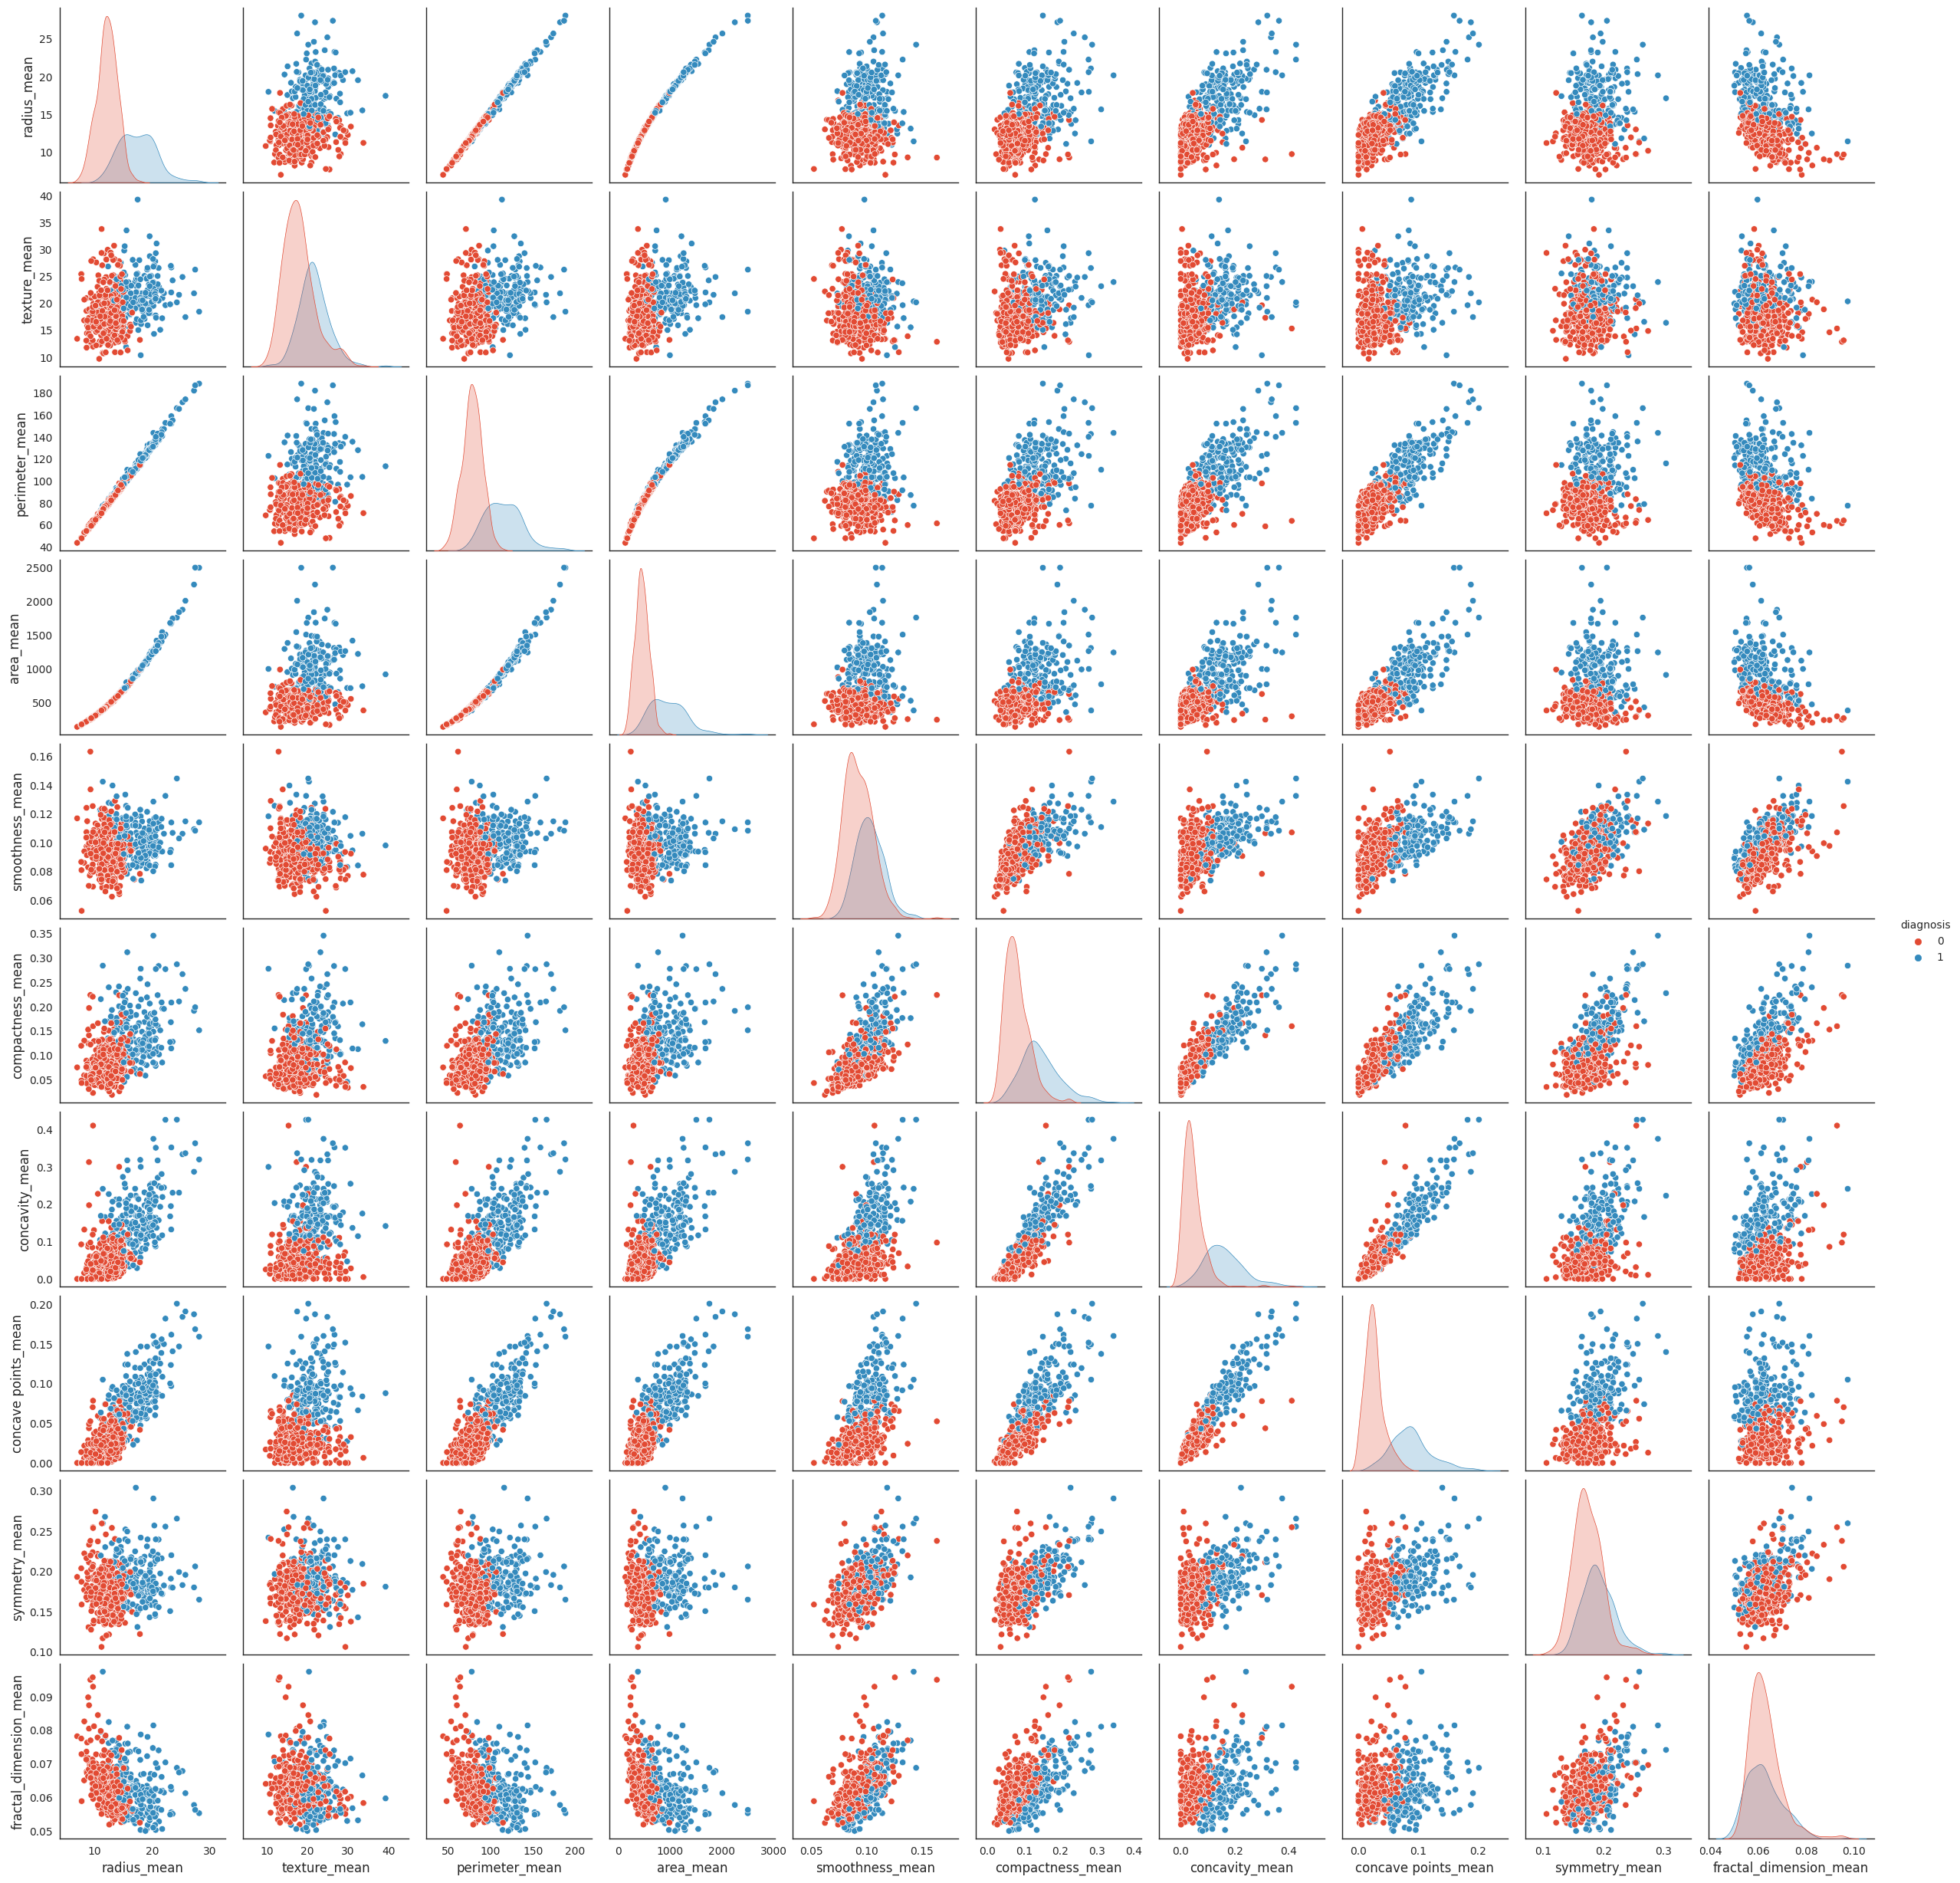

In [14]:
mean_data = pd.concat([y, data1[mean_metrics]],axis=1)
scatter_mat = sns.pairplot(mean_data, hue='diagnosis')

Text(0.5, 1.05, 'Pearson Correlation of Features')

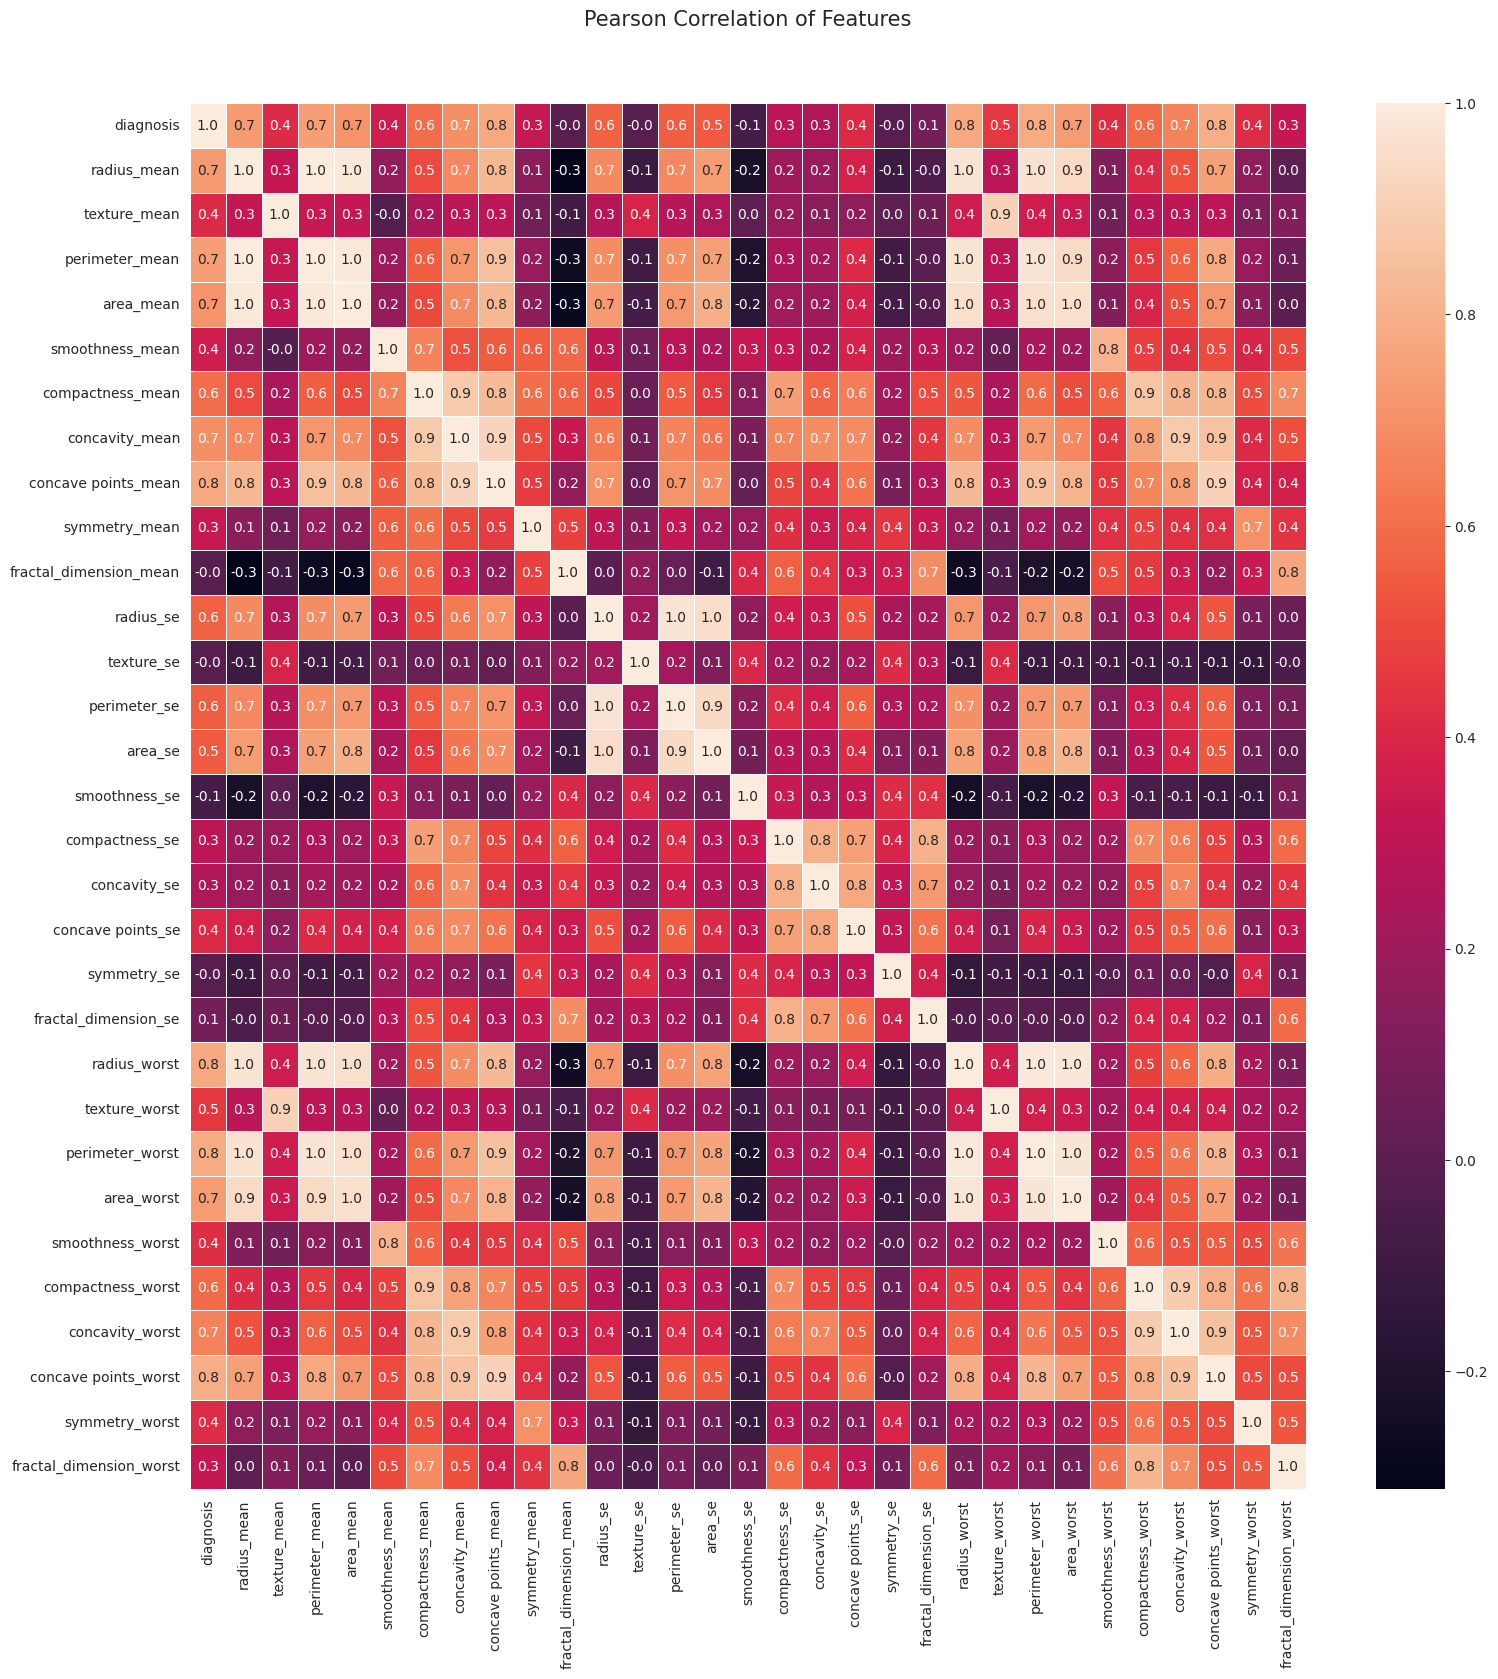

In [15]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Pearson Correlation of Features', y=1.05, size=15)


With this heatmap we can observe which features are strongly correlated and only choose one which makes classification more efficient and can even be more accurate:

* radius_mean, perimeter_mean and area_mean are strongly correlated -> choose one: radius_mean
* compactness_mean, concavity_mean and concave points_mean -> concavity_mean
* radius_se, perimeter_se and area_se are strongly correlated -> radius_se
* compactness_se, concavity_se and concave points_se -> concavity_se
* radius_worst, perimeter_worst and area_worst are strongly correlated -> radius_worst
* compactness_worst, concavity_worst and concave points_worst -> concavity_worst
* texture_mean and texture_worst -> texture_worst
* concavity_mean and concavity_worst -> concavity_mean
* radius_mean and radius_worst -> radius_mean

Drop correlated features:

In [16]:
drop_list1 = ['perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean','area_se','perimeter_se', 'area_worst', 'perimeter_worst', 'compactness_worst','concave points_worst',
             'compactness_se','concave points_se', 'texture_mean','radius_worst', 'concavity_worst']
X_1 = X.drop(drop_list1,axis = 1 )
X_1.head()

radius_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0        17.99          0.11840          0.3001         0.2419   
1        20.57          0.08474          0.0869         0.1812   
2        19.69          0.10960          0.1974         0.2069   
3        11.42          0.14250          0.2414         0.2597   
4        20.29          0.10030          0.1980         0.1809   

   fractal_dimension_mean  radius_se  texture_se  smoothness_se  concavity_se  \
0                 0.07871     1.0950      0.9053       0.006399       0.05373   
1                 0.05667     0.5435      0.7339       0.005225       0.01860   
2                 0.05999     0.7456      0.7869       0.006150       0.03832   
3                 0.09744     0.4956      1.1560       0.009110       0.05661   
4                 0.05883     0.7572      0.7813       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  texture_worst  smoothness_worst  \
0      0.03003              0.006193          17.33            0.1622   
1      0.01389              0.003532          23.41            0.1238   
2      0.02250              0.004571          25.53            0.1444   
3      0.05963              0.009208          26.50            0.2098   
4      0.01756              0.005115          16.67            0.1374   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

<Axes: >

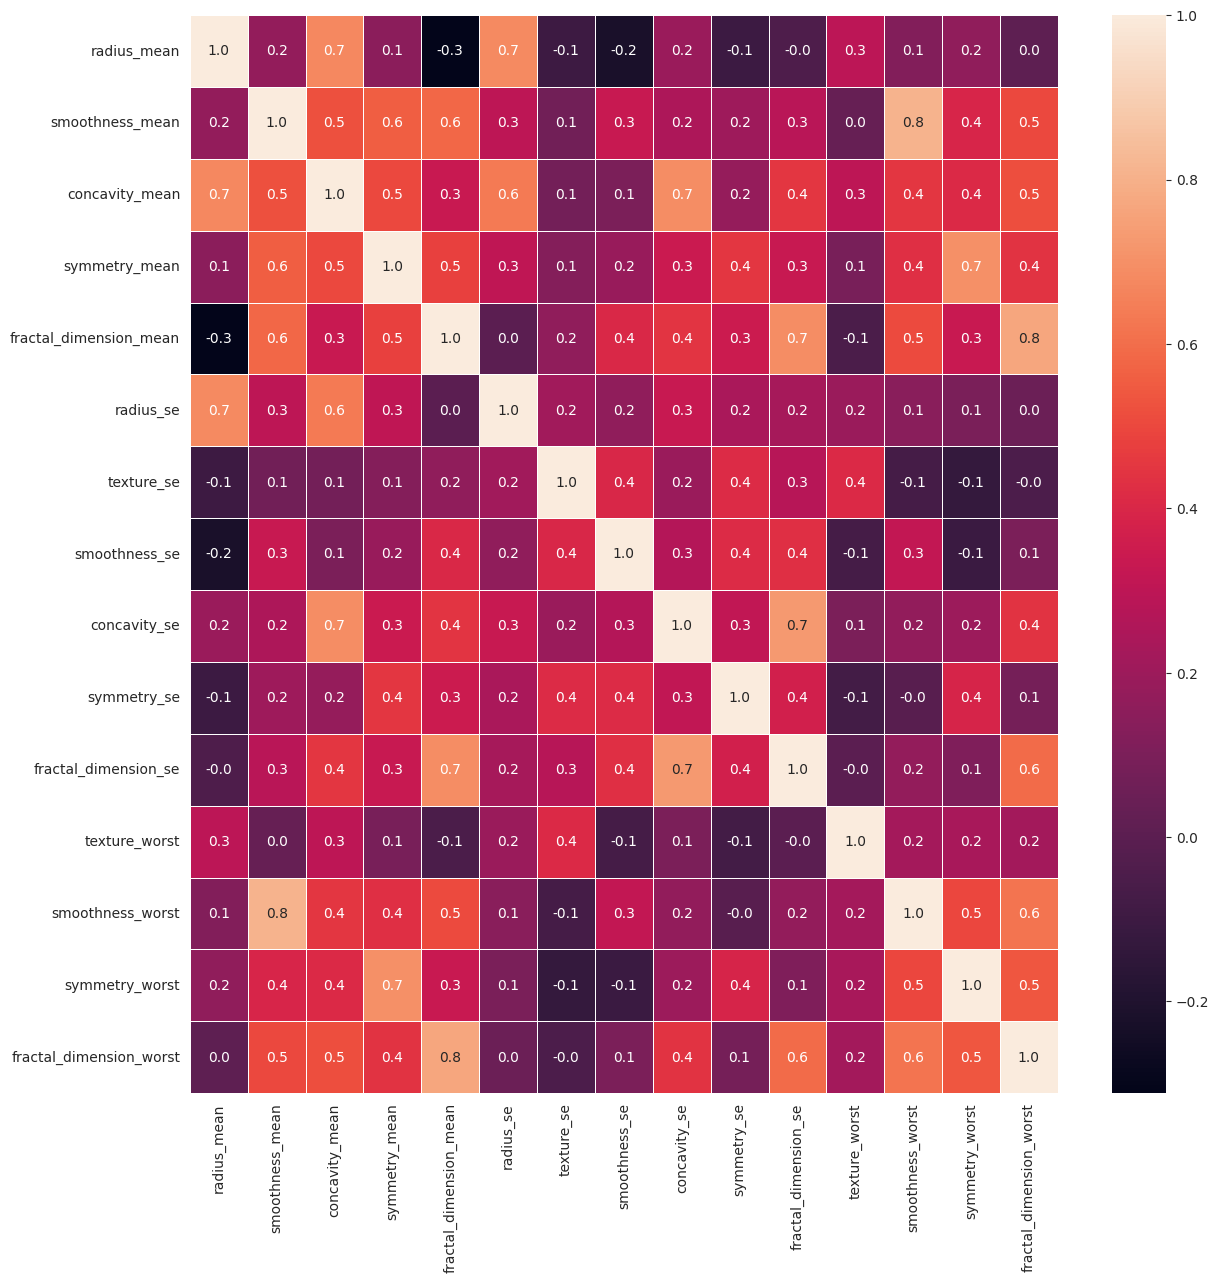

In [17]:
# Correlation map of remaining features
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Strongly correlated features have now been dropped.

## 5. Machine Learning

In this section we train and compare different models.

### 5.1 Create Train and Test Split

We continue with the data where features were dropped. 

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_1, y, test_size=0.3, random_state=42)

### 5.2 Train Models

First we choose a random model just to see if everything works and get a rough estimate. Here we look at Random Forests.

Accuracy is:  95.32163742690058 %


Text(0.5, 1.0, 'Random Forest Classifier Confusion Matrix')

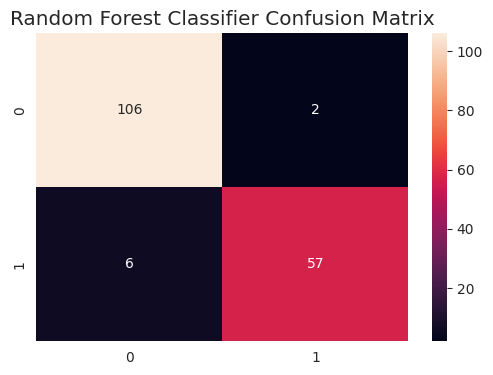

In [19]:
#random forest with n_estimators=10
clf_rf = ensemble.RandomForestClassifier(random_state=23)      
clr_rf = clf_rf.fit(X_train,y_train)

plt.figure(figsize=(6,4))
ac = metrics.accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac * 100, '%')
cm = metrics.confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.title('Random Forest Classifier Confusion Matrix')

Try out various algorithms and compare the performances on Cross-Validation.

In [20]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 )

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv  = cv_split, return_train_score=True)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   

    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3 #capture 99,7% due to three standard deviations
    
    alg.fit(X_train, y_train)

    row_index+=1

In [21]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

MLA Name  \
2            ExtraTreesClassifier   
6            LogisticRegressionCV   
0              AdaBoostClassifier   
4          RandomForestClassifier   
8               RidgeClassifierCV   
20  QuadraticDiscriminantAnalysis   
21                  XGBClassifier   
19     LinearDiscriminantAnalysis   
16                      LinearSVC   
3      GradientBoostingClassifier   
1               BaggingClassifier   
5       GaussianProcessClassifier   
14                            SVC   
12                     GaussianNB   
15                          NuSVC   
13           KNeighborsClassifier   
17         DecisionTreeClassifier   
18            ExtraTreeClassifier   
9                   SGDClassifier   
11                    BernoulliNB   
7     PassiveAggressiveClassifier   
10                     Perceptron   

                                       MLA Parameters MLA Train Accuracy Mean  \
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...                     1.0   
6   {'Cs': 10, 'class_weight': None, 'cv': None, '...                0.976978   
0   {'algorithm': 'SAMME.R', 'base_estimator': 'de...                     1.0   
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...                     1.0   
8   {'alphas': (0.1, 1.0, 10.0), 'class_weight': N...                0.956115   
20  {'priors': None, 'reg_param': 0.0, 'store_cova...                0.969784   
21  {'objective': 'binary:logistic', 'base_score':...                     1.0   
19  {'covariance_estimator': None, 'n_components':...                0.959712   
16  {'C': 1.0, 'class_weight': None, 'dual': True,...                0.929856   
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...                     1.0   
1   {'base_estimator': 'deprecated', 'bootstrap': ...                0.994964   
5   {'copy_X_train': True, 'kernel': None, 'max_it...                0.947842   
14  {'C': 1.0, 'break_ties': False, 'cache_size': ...                0.889928   
12           {'priors': None, 'var_smoothing': 1e-09}                0.926259   
15  {'break_ties': False, 'cache_size': 200, 'clas...                0.883813   
13  {'algorithm': 'auto', 'leaf_size': 30, 'metric...                0.917266   
17  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                     1.0   
18  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                     1.0   
9   {'alpha': 0.0001, 'average': False, 'class_wei...                0.788849   
11  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...                0.622302   
7   {'C': 1.0, 'average': False, 'class_weight': N...                0.595683   
10  {'alpha': 0.0001, 'class_weight': None, 'early...                 0.48777   

   MLA Test Accuracy Mean MLA Test Accuracy 3*STD  MLA Time  
2                  0.9675                0.030516  0.122665  
6                0.966667                0.040311  0.512054  
0                0.955833                0.058149  0.105555  
4                0.949167                0.030516  0.176689  
8                0.948333                0.031225  0.007069  
20               0.948333                    0.04  0.003025  
21               0.940833                0.051781  0.067678  
19                   0.94                0.041533   0.00386  
16               0.936667                0.047697  0.018811  
3                0.934167                0.058577  0.195994  
1                0.923333                0.063048  0.033297  
5                0.916667                0.031623  0.032834  
14               0.914167                0.081432  0.013699  
12                 0.9125                0.079254  0.002949  
15               0.904167                0.091686  0.019806  
13               0.898333                    0.06  0.003205  
17               0.880833                0.046165  0.004679  
18               0.856667                0.108282  0.002916  
9                    0.79                    0.34  0.004059  
11               0.633333                0.054772  0.003573  
7      

Text(0, 0.5, 'Algorithm')

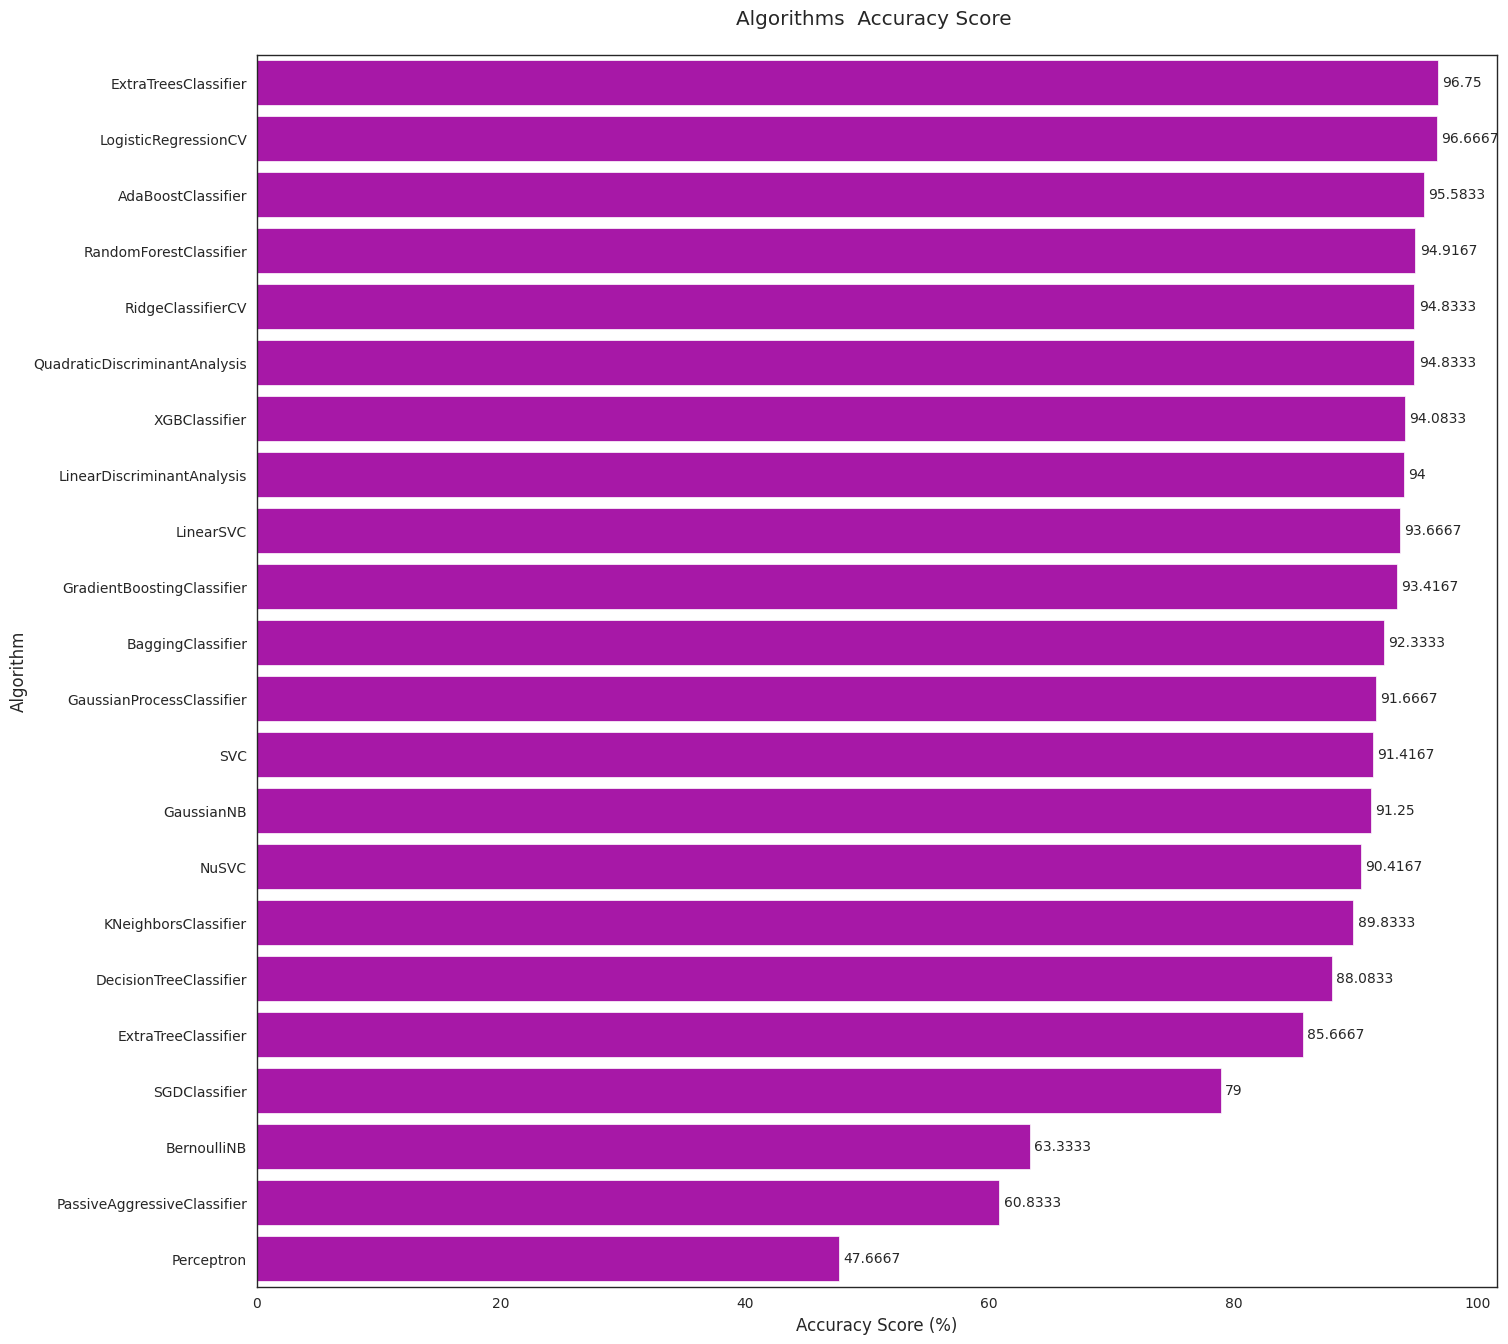

In [22]:
accuracy_scores = {
    'MLA Test Accuracy Mean': MLA_compare['MLA Test Accuracy Mean'] * 100, 
    'MLA Name': MLA_compare['MLA Name']
}
_,ax = plt.subplots(figsize=(16, 16))
ax = sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = accuracy_scores, color = 'm')
ax.bar_label(ax.containers[0], padding=3)

plt.title('Algorithms  Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Looking at the class distribution of 357 benign and 212 malignant diagnoses we can achieve a base accuracy of 62,7% when predicting only benign. The Perceptron performes badly probably due to the small amount of data. The best performing models are linear models like logistic regression and ensemble decision trees like ExtraTrees, Adaboost Trees and Random Forests.  

### 5.3 Tune Ensemble Model Further

In this section we want to tune one ensemble method further to see if a higher accuracy is achievable. For this example the ExtraTrees Classifier is chosen. 

#### 5.3.1 Hyperparameter Tuning

We do a simple Grid Search to find better hyperparameters.

In [23]:
base_model = ensemble.ExtraTreesClassifier()
base_results = model_selection.cross_validate(base_model, X_train, y_train, cv  = cv_split, return_train_score=True)
base_model.fit(X_train, y_train)
print('BEFORE DT Parameters: ', base_model.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

param_grid = {'n_estimators': [10, 50, 100, 300], 
            'criterion': ['gini', 'entropy'], 
            'max_depth': [2, 4, 6, 8, 10, None], 
             }

hp_tuned_model = model_selection.GridSearchCV(ensemble.ExtraTreesClassifier(), param_grid=param_grid, scoring = 'accuracy', return_train_score=True)
hp_tuned_model.fit(X_train, y_train)

print('AFTER DT Parameters: ', hp_tuned_model.best_params_)
print("AFTER DT Training w/bin score mean: {:.2f}". format(hp_tuned_model.cv_results_['mean_train_score'][hp_tuned_model.best_index_]*100)) 
print("AFTER DT Test w/bin score mean: {:.2f}". format(hp_tuned_model.cv_results_['mean_test_score'][hp_tuned_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(hp_tuned_model.cv_results_['std_test_score'][hp_tuned_model.best_index_]*100*3))
print('-'*10)

BEFORE DT Parameters:  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE DT Training w/bin score mean: 100.00
BEFORE DT Test w/bin score mean: 96.92
BEFORE DT Test w/bin score 3*std: +/- 3.36
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
AFTER DT Training w/bin score mean: 100.00
AFTER DT Test w/bin score mean: 96.98
AFTER DT Test w/bin score 3*std: +/- 1.86
----------


We get a negligible boost in accuracy.

#### 5.3.2 Automatic Feature Selection

Check whether a better performance is achievable through further Recursive Feature Elimination.

In [24]:
print('BEFORE DT RFE Training Shape Old: ', X_train.shape) 
print('BEFORE DT RFE Training Columns Old: ', X_train.columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

rc_rfe = feature_selection.RFECV(base_model, step=1, scoring='accuracy', cv = cv_split)
rc_rfe.fit(X_train, y_train)

X_rfe = X_train.columns.values[rc_rfe.get_support()]
rfe_results = model_selection.cross_validate(base_model, X_train[X_rfe], y_train, cv  = cv_split, return_train_score=True)

print('AFTER DT RFE Training Shape New: ', X_train[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)
print('OPTIMAL NUMBER OF FEATURES:', rc_rfe.n_features_)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))

print('-'*10)

#tune rfe model
rfe_tuned_model = model_selection.GridSearchCV(ensemble.ExtraTreesClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
rfe_tuned_model.fit(X_train[X_rfe], y_train)


print('AFTER DT RFE Tuned Parameters: ', rfe_tuned_model.best_params_)
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tuned_model.cv_results_['mean_train_score'][hp_tuned_model.best_index_]*100)) 
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tuned_model.cv_results_['mean_test_score'][hp_tuned_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tuned_model.cv_results_['std_test_score'][hp_tuned_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (398, 15)
BEFORE DT RFE Training Columns Old:  ['radius_mean' 'smoothness_mean' 'concavity_mean' 'symmetry_mean'
 'fractal_dimension_mean' 'radius_se' 'texture_se' 'smoothness_se'
 'concavity_se' 'symmetry_se' 'fractal_dimension_se' 'texture_worst'
 'smoothness_worst' 'symmetry_worst' 'fractal_dimension_worst']
BEFORE DT RFE Training w/bin score mean: 100.00
BEFORE DT RFE Test w/bin score mean: 96.92
BEFORE DT RFE Test w/bin score 3*std: +/- 3.36
----------
AFTER DT RFE Training Shape New:  (398, 14)
AFTER DT RFE Training Columns New:  ['radius_mean' 'smoothness_mean' 'concavity_mean' 'symmetry_mean'
 'fractal_dimension_mean' 'radius_se' 'smoothness_se' 'concavity_se'
 'symmetry_se' 'fractal_dimension_se' 'texture_worst' 'smoothness_worst'
 'symmetry_worst' 'fractal_dimension_worst']
OPTIMAL NUMBER OF FEATURES: 14
AFTER DT RFE Training w/bin score mean: 100.00
AFTER DT RFE Test w/bin score mean: 96.25
AFTER DT RFE Test w/bin score 3*std: +/- 5.03
----

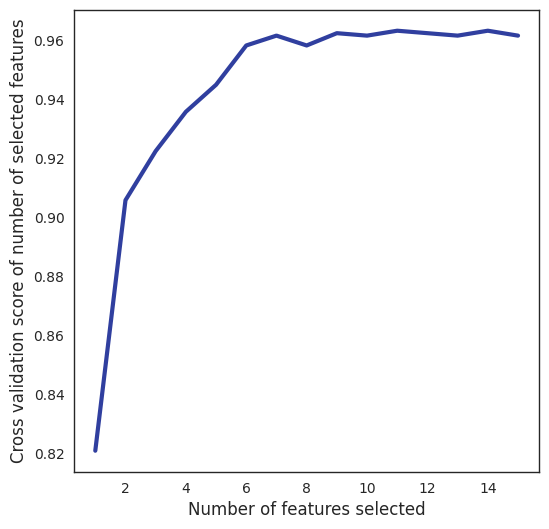

In [25]:
plt.figure(figsize=(6,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rc_rfe.cv_results_['mean_test_score']) + 1), rc_rfe.cv_results_['mean_test_score'], color='#303F9F', linewidth=3)
plt.show()

Recursive Feature Elimination did remove further features resulting again in a negligible boost in accuracy when using the hyperparameter tuned model with 12 features.

## 6. Validate

We will evaluate all models on the test data aswell as our tuned ExtraTrees Classifier model. We will use the original 15 features instead of the 12 features that were selected by Recursive Feature Elimination.

In [26]:
MLA_val_columns = ['MLA Name', 'MLA Parameters','MLA Prediction Accuracy Mean']
MLA_val_compare = pd.DataFrame(columns = MLA_val_columns)

row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    MLA_val_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_val_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    ac = metrics.accuracy_score(y_test, alg.predict(X_test))

    MLA_val_compare.loc[row_index, 'MLA Prediction Accuracy Mean'] = ac
    
    row_index+=1

MLA_name = 'ExtraTreesClassifierHPTuned'
MLA_val_compare.loc[row_index, 'MLA Name'] = MLA_name
MLA_val_compare.loc[row_index, 'MLA Parameters'] = str(hp_tuned_model.get_params())

ac = metrics.accuracy_score(y_test, hp_tuned_model.predict(X_test))

MLA_val_compare.loc[row_index, 'MLA Prediction Accuracy Mean'] = ac

In [27]:
MLA_val_compare.sort_values(by = ['MLA Prediction Accuracy Mean'], ascending = False, inplace = True)
MLA_val_compare

MLA Name  \
0              AdaBoostClassifier   
21                  XGBClassifier   
8               RidgeClassifierCV   
16                      LinearSVC   
6            LogisticRegressionCV   
20  QuadraticDiscriminantAnalysis   
19     LinearDiscriminantAnalysis   
22    ExtraTreesClassifierHPTuned   
4          RandomForestClassifier   
2            ExtraTreesClassifier   
1               BaggingClassifier   
3      GradientBoostingClassifier   
14                            SVC   
9                   SGDClassifier   
12                     GaussianNB   
13           KNeighborsClassifier   
17         DecisionTreeClassifier   
15                          NuSVC   
5       GaussianProcessClassifier   
18            ExtraTreeClassifier   
7     PassiveAggressiveClassifier   
11                    BernoulliNB   
10                     Perceptron   

                                       MLA Parameters  \
0   {'algorithm': 'SAMME.R', 'base_estimator': 'de...   
21  {'objective': 'binary:logistic', 'base_score':...   
8   {'alphas': (0.1, 1.0, 10.0), 'class_weight': N...   
16  {'C': 1.0, 'class_weight': None, 'dual': True,...   
6   {'Cs': 10, 'class_weight': None, 'cv': None, '...   
20  {'priors': None, 'reg_param': 0.0, 'store_cova...   
19  {'covariance_estimator': None, 'n_components':...   
22  {'cv': None, 'error_score': nan, 'estimator__b...   
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...   
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...   
1   {'base_estimator': 'deprecated', 'bootstrap': ...   
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...   
14  {'C': 1.0, 'break_ties': False, 'cache_size': ...   
9   {'alpha': 0.0001, 'average': False, 'class_wei...   
12           {'priors': None, 'var_smoothing': 1e-09}   
13  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
17  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...   
15  {'break_ties': False, 'cache_size': 200, 'clas...   
5   {'copy_X_train': True, 'kernel': None, 'max_it...   
18  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...   
7   {'C': 1.0, 'average': False, 'class_weight': N...   
11  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...   
10  {'alpha': 0.0001, 'class_weight': None, 'early...   

   MLA Prediction Accuracy Mean  
0                      0.976608  
21                     0.976608  
8                      0.964912  
16                     0.964912  
6                      0.959064  
20                     0.953216  
19                     0.953216  
22                     0.953216  
4                      0.953216  
2                      0.953216  
1                      0.947368  
3                      0.947368  
14                     0.929825  
9                      0.918129  
12                     0.918129  
13                     0.912281  
17                     0.912281  
15                     0.900585  
5                      0.883041  
18                     0.871345  
7                      0.666667  
11                     0.631579  
10                     0.391813

Text(0, 0.5, 'Algorithm')

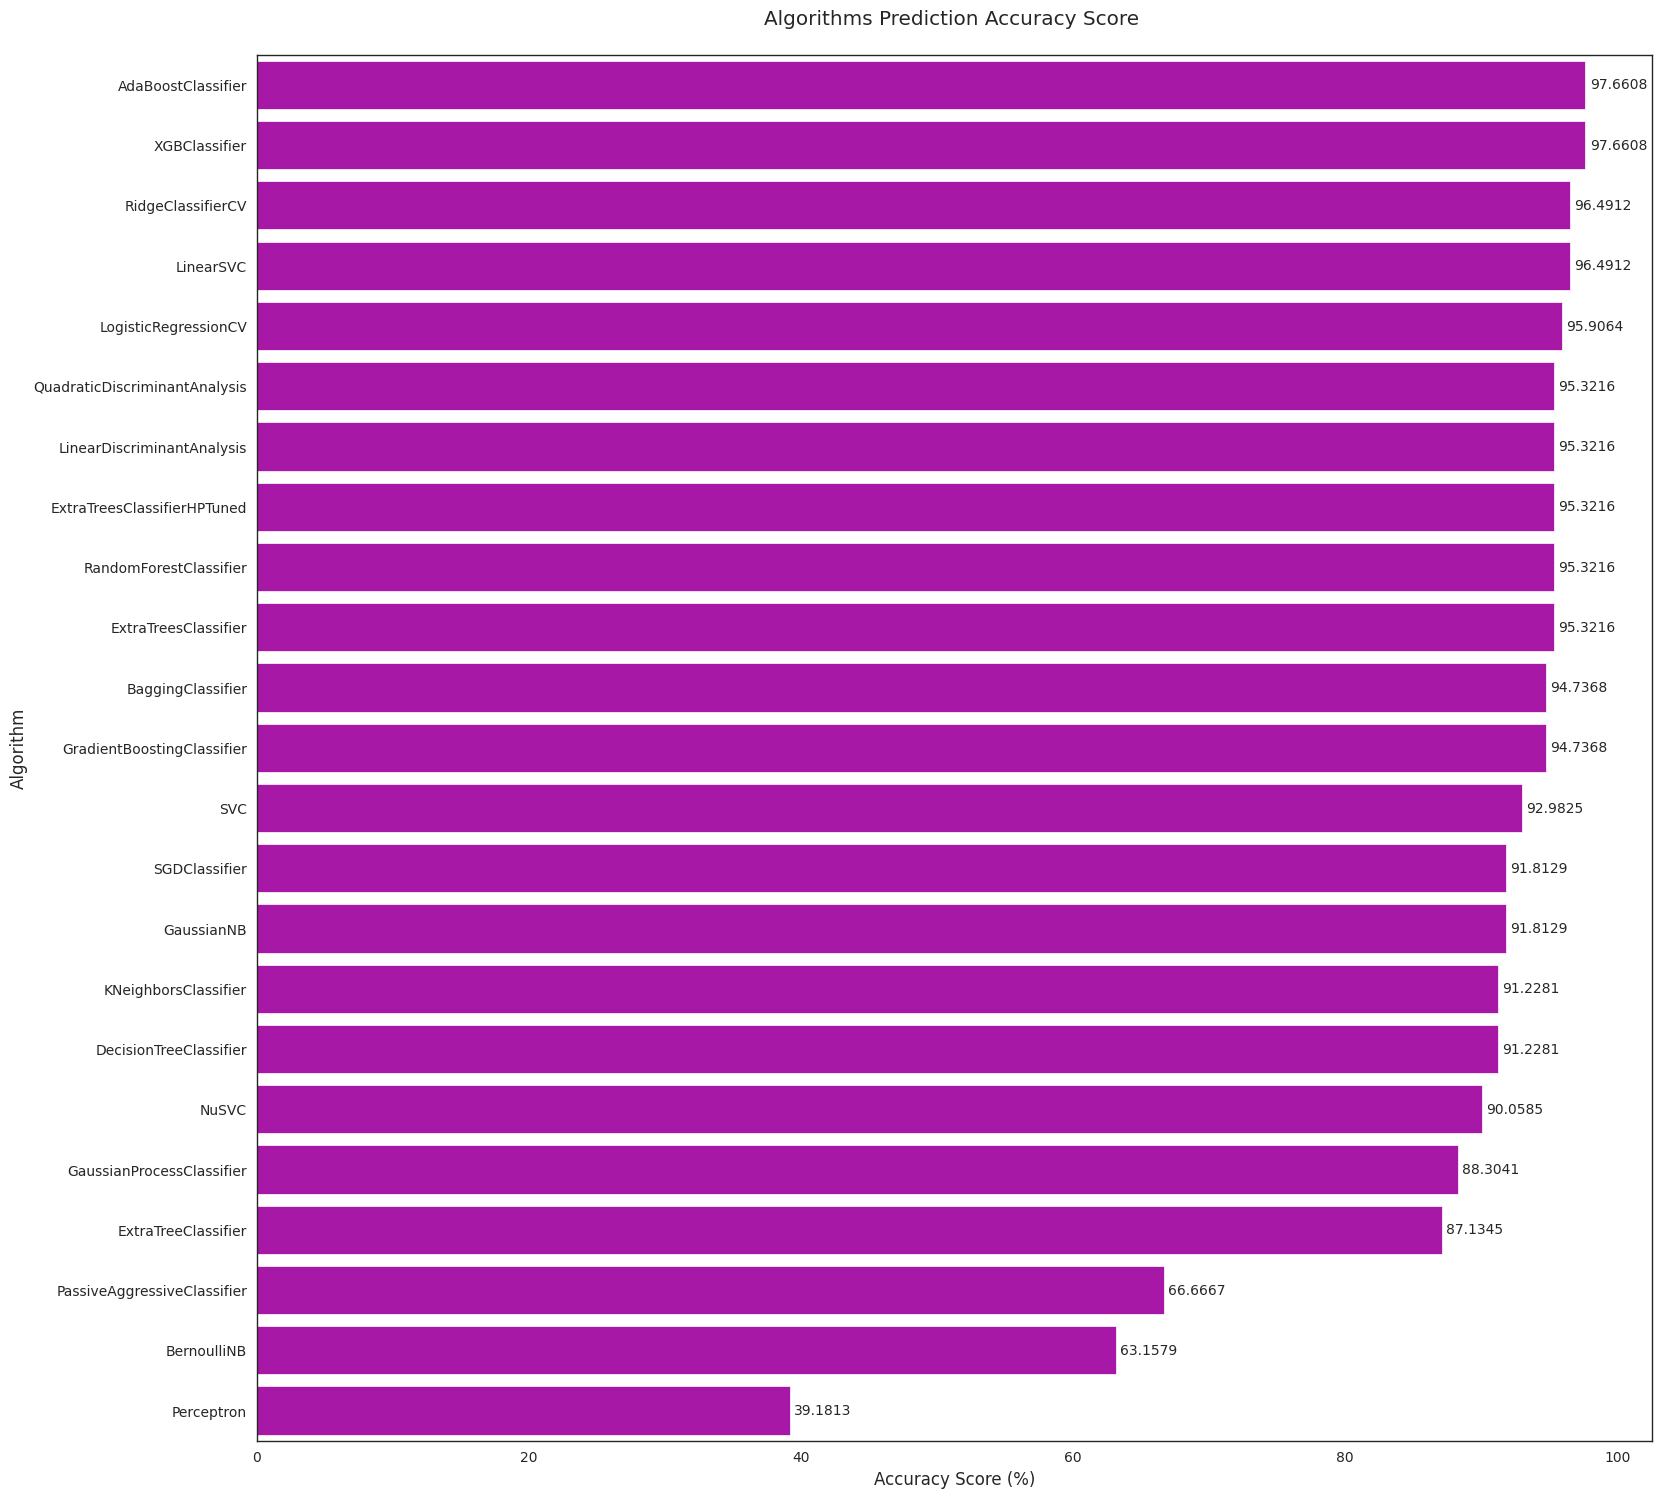

In [28]:
accuracy_val_scores = {
    'MLA Prediction Accuracy Mean': MLA_val_compare['MLA Prediction Accuracy Mean'] * 100, 
    'MLA Name': MLA_val_compare['MLA Name']
}
_,ax = plt.subplots(figsize=(18, 18))
ax = sns.barplot(x='MLA Prediction Accuracy Mean', y = 'MLA Name', data = accuracy_val_scores, color = 'm')
ax.bar_label(ax.containers[0], padding=3)

plt.title('Algorithms Prediction Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Accuracy is:  0.9766081871345029


Text(0.5, 1.0, 'AdaBoost Classifier Confusion Matrix')

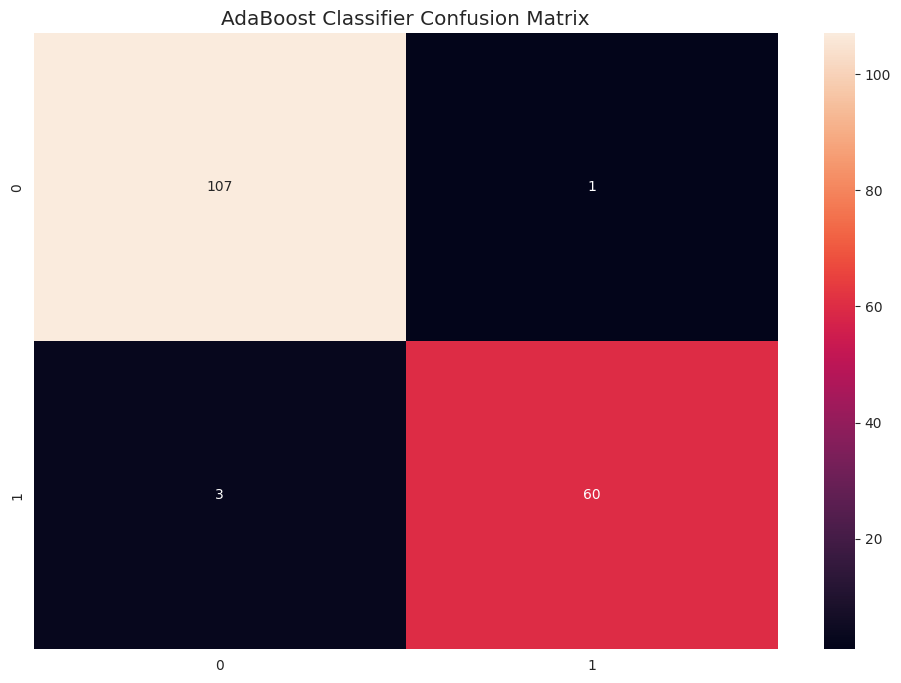

In [29]:
ac = metrics.accuracy_score(y_test, MLA[0].predict(X_test))
print('Accuracy is: ',ac)
cm = metrics.confusion_matrix(y_test, MLA[0].predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.title('AdaBoost Classifier Confusion Matrix')

To conclude this kernel, we can say that we can achieve a accuracy of upto 97% when predicting breast cancer. This accuracy can potentially be even higher with more data and further tuning but what is surprising is, that the default AdaBoost Classifier seems to perform best on the test data, while previously best model Logistic Regression dropped off in accuracy.